# Here, I will export figures related to microbiome richness vs. coral size and latitude for use at the International Coral Reef Symposium

In [1]:
setwd('..')
getwd()

[1] "/Volumes/Macintosh_HDD/Dropbox/Coral_Microbiomes_Postdoc/GCMP_OSU_PSU_Shared_Folder/Coral_microbe_coevolution/Projects/Australia_Coevolution_Paper/16S_analysis/7_microbiomes_w_coral_size_lat"

In [1]:
library(ggplot2)
library(svglite)
library(gridExtra)
library(grid)

In [3]:
#Import the data
read.csv('output/microbiome_age_v2.csv', header=T)->data
head(data)

#remove Unknown size
subset(data,colony_width_max != "Unknown")->data_no_unknown_size

#remove Unknown functional group
subset(data_no_unknown_size,functional_group_sensu_darling != "Unknown")->data_no_unknown_size_or_functional_group

,X.SampleID,PD_whole_tree,observed_otus,Chao1,SampleID,BarcodeSequence,runID,sequence_center_ID,sequence_center_ID_base,collection_id,ellip.h,collected_by,relevant_collaborators,visibility,visibility_method,env_biome,env_feature,prop_Colony_maximum_GCMP_recorded,prop_Colony_maximum_diameter_universal,prop_Colony_maximum_diameter,Description
1,E1.6.Iso.pali.1.20140803.M.2,37.90184,222,558.6,E1.6.Iso.pali.1.20140803.M.2,TACACAGTAG,ALVCP,Pollock117,Pollock117,Unknown,⋯,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,E1.6.Iso.pali.1.20140803.S.2,43.177,275,541.1429,E1.6.Iso.pali.1.20140803.S.2,CAGTCTACAT,ALVCP,Pollock119,Pollock119,Unknown,⋯,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,E1.6.Iso.pali.1.20140803.T.2,11.77071,72,237,E1.6.Iso.pali.1.20140803.T.2,TACTGCAGCG,ALVCP,Pollock118,Pollock118,Unknown,⋯,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,E10.Sed.1.20150627,74.79289,614,2318.721,E10.Sed.1.20150627,GATGTAGCGT,AN5UL,Pollock377_LH_268_SED,Pollock377,North_Bay_20150627,⋯,Joe_Pollock,Unknown,20,Diver_Estimate,coral_reef,animal-associated_habitat,Unknown,Unknown,Unknown,None
5,E10.Sed.1.20150628,86.31142,647,2820.015,E10.Sed.1.20150628,GTATCGTCGT,ALVCP,Pollock8,Pollock8,North_Bay_20150628,⋯,Joe_Pollock,Unknown,20,Diver_Estimate,coral_reef,animal-associated_habitat,Unknown,Unknown,Unknown,None
6,E10.Sed.1.20150630,77.96732,633,1653.509,E10.Sed.1.20150630,TCTCTGTGCA,AN5UL,Pollock419_LH_305_SED,Pollock419,Far_Flats_20150630,⋯,Joe_Pollock,Unknown,15,Diver_Estimate,coral_reef,animal-associated_habitat,Unknown,Unknown,Unknown,None


In [4]:
#Define function to ensure plots are a consistent size (useful for overlay, multipanels, etc)
set_panel_size <- function(p=NULL, g=ggplotGrob(p), file=NULL, 
                           margin = unit(1,"mm"),
                           width=unit(4, "cm"), 
                           height=unit(4, "cm")){

  panels <- grep("panel", g$layout$name)
  panel_index_w<- unique(g$layout$l[panels])
  panel_index_h<- unique(g$layout$t[panels])
  nw <- length(panel_index_w)
  nh <- length(panel_index_h)

if(getRversion() < "3.3.0"){

   # the following conversion is necessary
   # because there is no `[<-`.unit method
   # so promoting to unit.list allows standard list indexing
   g$widths <- grid:::unit.list(g$widths)
   g$heights <- grid:::unit.list(g$heights)

   g$widths[panel_index_w] <-  rep(list(width),  nw)
   g$heights[panel_index_h] <- rep(list(height), nh)

} else {

   g$widths[panel_index_w] <-  rep(width,  nw)
   g$heights[panel_index_h] <- rep(height, nh)

}

  if(!is.null(file))
    ggsave(file, g, 
           width = convertWidth(sum(g$widths) + margin, 
                                unitTo = "in", valueOnly = TRUE),
           height = convertHeight(sum(g$heights) + margin,  
                                  unitTo = "in", valueOnly = TRUE))

  g
}

In [5]:
plot1 <-ggplot(data_no_unknown_size, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)))) +
    geom_point(shape=1) +
    geom_smooth(method=lm,se=TRUE)

g1 <- set_panel_size(plot1)
ggsave(g1, file="/Users/FJPollock/Dropbox/Coral_Microbiomes_Postdoc/GCMP_OSU_PSU_Shared_Folder/Coral_microbe_coevolution/Projects/Australia_Coevolution_Paper/16S_analysis/7_microbiomes_w_coral_size_lat/output/figures/raw_output/size_v_pd_no_color.svg")

ERROR: Error in ggsave(g1, file = "/Users/FJPollock/Dropbox/Coral_Microbiomes_Postdoc/GCMP_OSU_PSU_Shared_Folder/Coral_microbe_coevolution/Projects/Australia_Coevolution_Paper/16S_analysis/7_microbiomes_w_coral_size_lat/output/figures/raw_output/size_v_pd_no_color.svg"): plot should be a ggplot2 plot


Warning message:
In eval(expr, envir, enclos): NAs introduced by coercion

ERROR: Error in file(con, "rb"): cannot open the connection


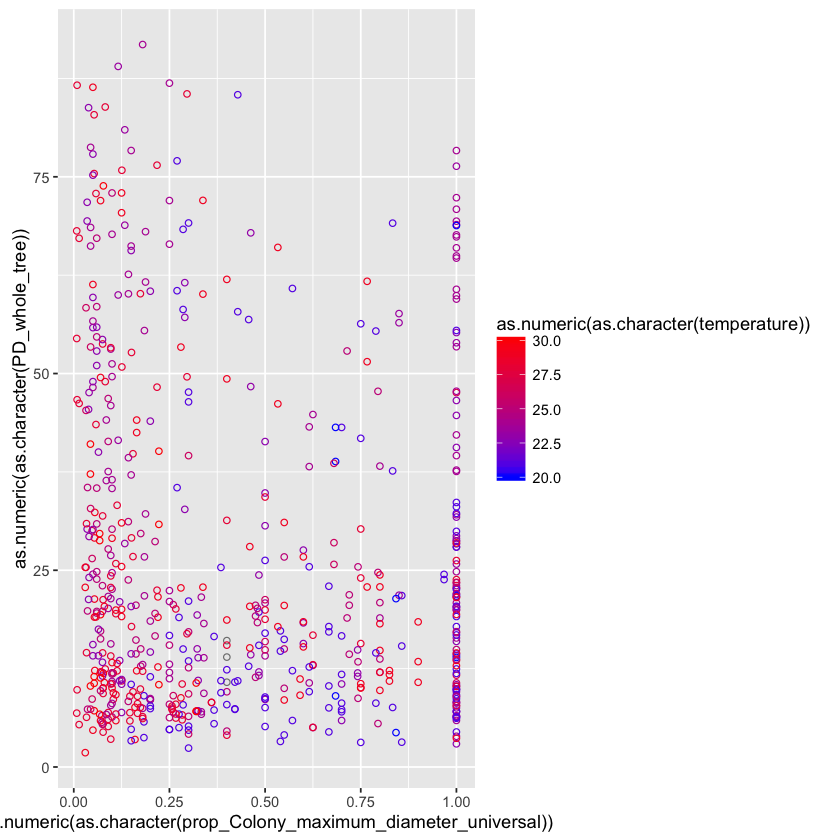

In [120]:
ggplot(data_no_unknown_size, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)),color=as.numeric(as.character(temperature)))) +
    geom_point(shape=1) +
    scale_colour_gradient(high="red",low="blue")

In [121]:
plot2 <-ggplot(data_no_unknown_size, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)),color=as.numeric(as.character(temperature)))) +
    geom_point(shape=1) +
    scale_colour_gradient(high="red",low="blue") 

g1 <- set_panel_size(plot2)
ggsave(g1, file="/Users/FJPollock/Dropbox/Coral_Microbiomes_Postdoc/GCMP_OSU_PSU_Shared_Folder/Coral_microbe_coevolution/Projects/Australia_Coevolution_Paper/16S_analysis/7_microbiomes_w_coral_size_lat/output/figures/raw_output/size_v_pd_color_temperature.svg")

Warning message:
In eval(expr, envir, enclos): NAs introduced by coercionSaving 7 x 7 in image


# Latitude

In [28]:
#Import the data
read.csv('output/microbiome_age_v2.csv', header=T)->data
subset(data, BiologicalMatter == "Coral_Tissue" | BiologicalMatter == "Coral_Mucus" | BiologicalMatter == "Coral_Skeleton")->data_corals_only

In [29]:
#Define function to ensure plots are a consistent size (useful for overlay, multipanels, etc)
set_panel_size <- function(p=NULL, g=ggplotGrob(p), file=NULL, 
                           margin = unit(1,"mm"),
                           width=unit(8, "cm"), 
                           height=unit(16, "cm")){

  panels <- grep("panel", g$layout$name)
  panel_index_w<- unique(g$layout$l[panels])
  panel_index_h<- unique(g$layout$t[panels])
  nw <- length(panel_index_w)
  nh <- length(panel_index_h)

if(getRversion() < "3.3.0"){

   # the following conversion is necessary
   # because there is no `[<-`.unit method
   # so promoting to unit.list allows standard list indexing
   g$widths <- grid:::unit.list(g$widths)
   g$heights <- grid:::unit.list(g$heights)

   g$widths[panel_index_w] <-  rep(list(width),  nw)
   g$heights[panel_index_h] <- rep(list(height), nh)

} else {

   g$widths[panel_index_w] <-  rep(width,  nw)
   g$heights[panel_index_h] <- rep(height, nh)

}

  if(!is.null(file))
    ggsave(file, g, 
           width = convertWidth(sum(g$widths) + margin, 
                                unitTo = "in", valueOnly = TRUE),
           height = convertHeight(sum(g$heights) + margin,  
                                  unitTo = "in", valueOnly = TRUE))

  g
}

Saving 7 x 7 in image



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_corals_only$latitude)) and as.numeric(as.character(data_corals_only$observed_otus))
t = 5.0361, df = 625, p-value = 6.225e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1210480 0.2715785
sample estimates:
     cor 
0.197477 


ERROR: Error in file(con, "rb"): cannot open the connection


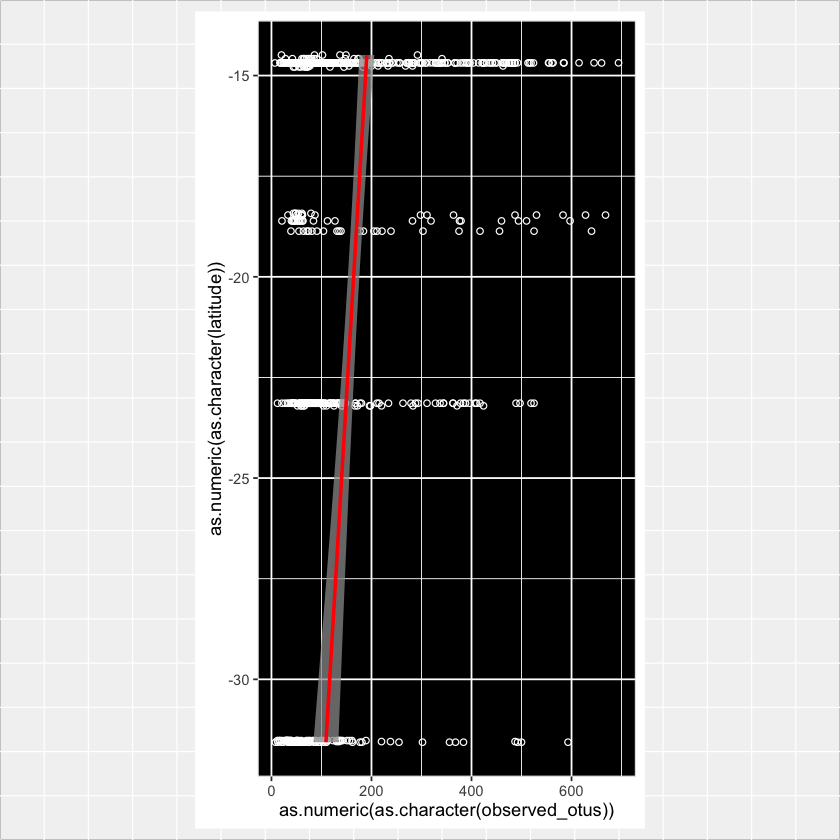

In [47]:
#Latitude v. observed_otus
#Clear plot
plot1<-0

#Define plot
plot1 <-ggplot(data_corals_only, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(observed_otus)))) +
    geom_point(shape=1, color = "white") +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE, color="red", alpha = 0.75) +   # Add shaded confidence region
#    scale_y_reverse() +
    coord_flip() +
    theme(panel.background = element_rect(fill = 'black', colour = 'white'))


#Apply function to standardize graph size
g1 <- set_panel_size(plot1)

#Save plot
ggsave(g1, file="/Users/FJPollock/Dropbox/Coral_Microbiomes_Postdoc/GCMP_OSU_PSU_Shared_Folder/Coral_microbe_coevolution/Projects/Australia_Coevolution_Paper/16S_analysis/7_microbiomes_w_coral_size_lat/output/figures/raw_output/lat_observed_otus_bw.svg")

#View plot
plot(g1)

cor.test(as.numeric(as.character(data_corals_only$latitude)), as.numeric(as.character(data_corals_only$observed_otus)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

Saving 7 x 7 in image



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_corals_only$latitude)) and as.numeric(as.character(data_corals_only$Chao1))
t = 4.287, df = 625, p-value = 2.097e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.09192854 0.24408330
sample estimates:
      cor 
0.1690127 


ERROR: Error in file(con, "rb"): cannot open the connection


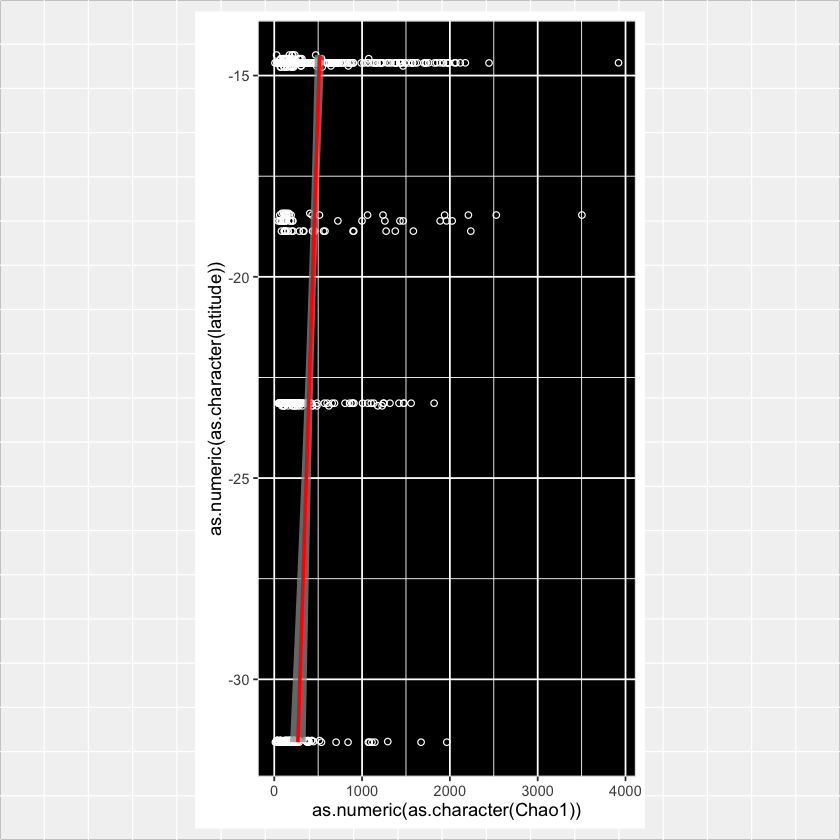

In [49]:
#Latitude v. chao1
#Clear plot
plot1<-0

#Define plot
plot1 <-ggplot(data_corals_only, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(Chao1)))) +
    geom_point(shape=1, color = "white") +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE, color="red", alpha = 0.75) +   # Add shaded confidence region
#    scale_y_reverse() +
    coord_flip() +
    theme(panel.background = element_rect(fill = 'black', colour = 'white'))


#Apply function to standardize graph size
g1 <- set_panel_size(plot1)

#Save plot
ggsave(g1, file="/Users/FJPollock/Dropbox/Coral_Microbiomes_Postdoc/GCMP_OSU_PSU_Shared_Folder/Coral_microbe_coevolution/Projects/Australia_Coevolution_Paper/16S_analysis/7_microbiomes_w_coral_size_lat/output/figures/raw_output/raw_output/lat_chao1_bw.svg")

#View plot
plot(g1)

cor.test(as.numeric(as.character(data_corals_only$latitude)), as.numeric(as.character(data_corals_only$Chao1)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

Saving 7 x 7 in image



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_corals_only$latitude)) and as.numeric(as.character(data_corals_only$PD_whole_tree))
t = 4.9931, df = 625, p-value = 7.718e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1193853 0.2700151
sample estimates:
      cor 
0.1958552 


ERROR: Error in file(con, "rb"): cannot open the connection


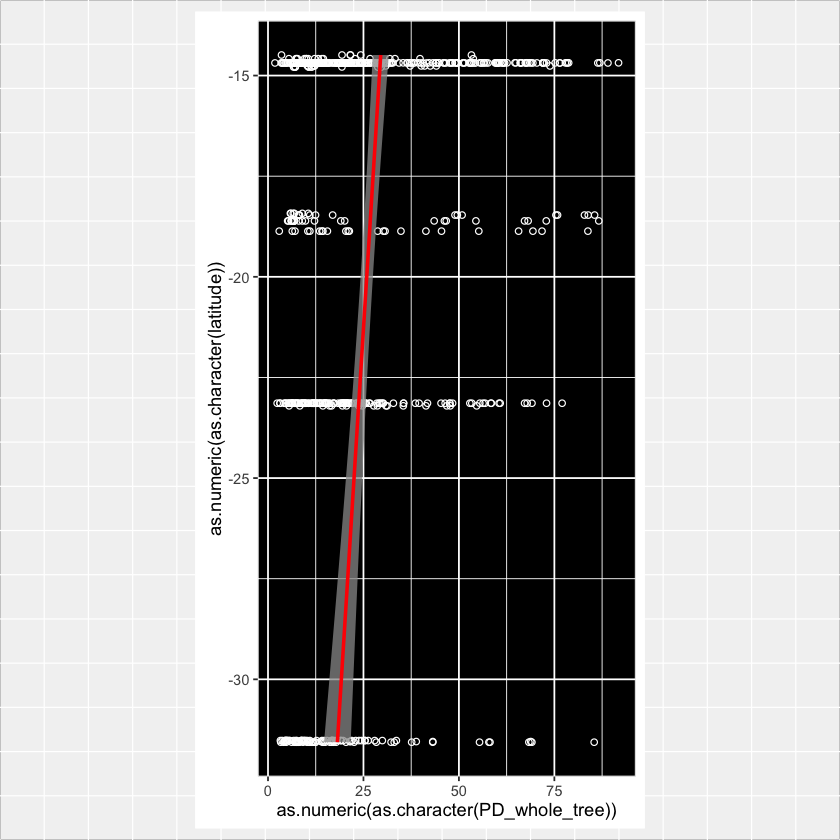

In [50]:
#Latitude v. PD_whole_tree
#Clear plot
plot1<-0

#Define plot
plot1 <-ggplot(data_corals_only, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)))) +
    geom_point(shape=1, color = "white") +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE, color="red", alpha = 0.75) +   # Add shaded confidence region
#    scale_y_reverse() +
    coord_flip() +
    theme(panel.background = element_rect(fill = 'black', colour = 'white'))


#Apply function to standardize graph size
g1 <- set_panel_size(plot1)

#Save plot
ggsave(g1, file="/Users/FJPollock/Dropbox/Coral_Microbiomes_Postdoc/GCMP_OSU_PSU_Shared_Folder/Coral_microbe_coevolution/Projects/Australia_Coevolution_Paper/16S_analysis/7_microbiomes_w_coral_size_lat/output/figures/raw_output/lat_PD_whole_bw.svg")

#View plot
plot(g1)


cor.test(as.numeric(as.character(data_corals_only$latitude)), as.numeric(as.character(data_corals_only$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

# Latitude v. PD_whole_tree w/ compartment

Saving 7 x 7 in image


[1] "Tissue"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_corals_only_tissue$latitude)) and as.numeric(as.character(data_corals_only_tissue$PD_whole_tree))
t = 2.4956, df = 201, p-value = 0.01338
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.03652468 0.30381907
sample estimates:
      cor 
0.1733625 


[1] "Mucus"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_corals_only_mucus$latitude)) and as.numeric(as.character(data_corals_only_mucus$PD_whole_tree))
t = 3.9406, df = 210, p-value = 0.0001107
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1323257 0.3835824
sample estimates:
     cor 
0.262396 


[1] "Skeleton"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_corals_only_skeleton$latitude)) and as.numeric(as.character(data_corals_only_skeleton$PD_whole_tree))
t = 2.8629, df = 210, p-value = 0.004624
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.0606454 0.3201974
sample estimates:
      cor 
0.1938106 


ERROR: Error in file(con, "rb"): cannot open the connection


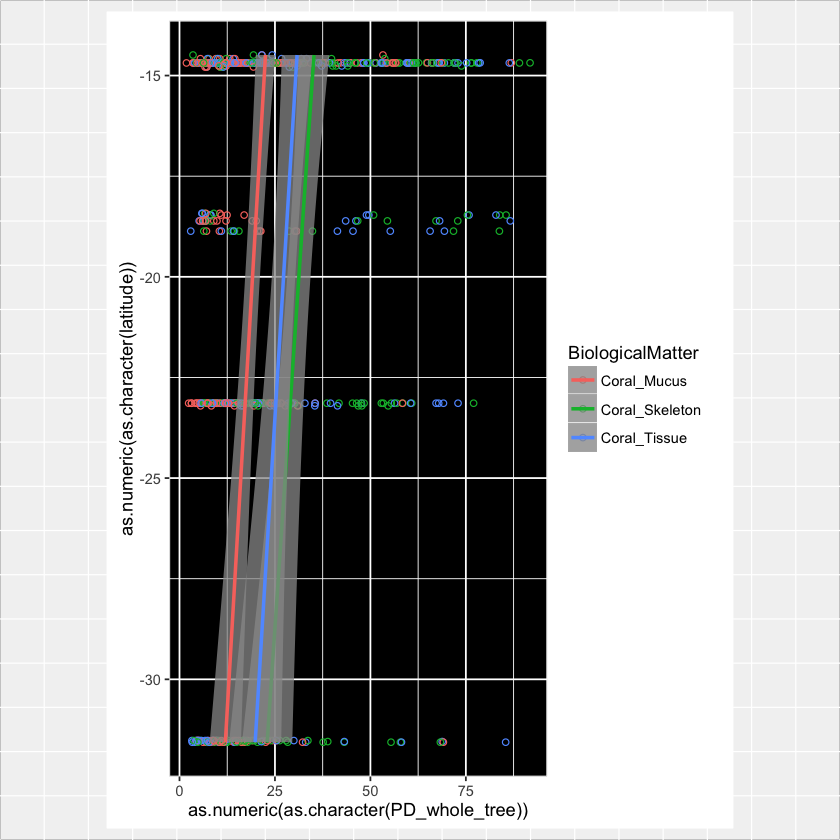

In [37]:
#Latitude v. PD_whole_tree w/ compartment
#Take data subsets for stats
subset(data, BiologicalMatter == "Coral_Tissue" | BiologicalMatter == "Coral_Mucus" | BiologicalMatter == "Coral_Skeleton")->data_corals_only
subset(data_corals_only, BiologicalMatter == "Coral_Tissue")->data_corals_only_tissue
subset(data_corals_only, BiologicalMatter == "Coral_Mucus")->data_corals_only_mucus
subset(data_corals_only, BiologicalMatter == "Coral_Skeleton")->data_corals_only_skeleton

#Clear plot
plot1<-0

#Define plot
plot1 <-ggplot(data_corals_only, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)), color=BiologicalMatter)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE, 
                alpha = 0.75) +  
    coord_flip() +
    theme(panel.background = element_rect(fill = 'black', colour = 'white'))

#Apply function to standardize graph size
g1 <- set_panel_size(plot1)

#Save plot
ggsave(g1, file="/Users/FJPollock/Dropbox/Coral_Microbiomes_Postdoc/GCMP_OSU_PSU_Shared_Folder/Coral_microbe_coevolution/Projects/Australia_Coevolution_Paper/16S_analysis/7_microbiomes_w_coral_size_lat/output/figures/raw_output/lat_PD_whole_compartment_color.svg")

#View plot
plot(g1)

#Test correlations w/ PPMC
print("Tissue")
cor.test(as.numeric(as.character(data_corals_only_tissue$latitude)), as.numeric(as.character(data_corals_only_tissue$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Mucus")
cor.test(as.numeric(as.character(data_corals_only_mucus$latitude)), as.numeric(as.character(data_corals_only_mucus$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Skeleton")
cor.test(as.numeric(as.character(data_corals_only_skeleton$latitude)), as.numeric(as.character(data_corals_only_skeleton$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)


Warning message:
In eval(expr, envir, enclos): NAs introduced by coercionSaving 7 x 7 in image


ERROR: Error in file(con, "rb"): cannot open the connection


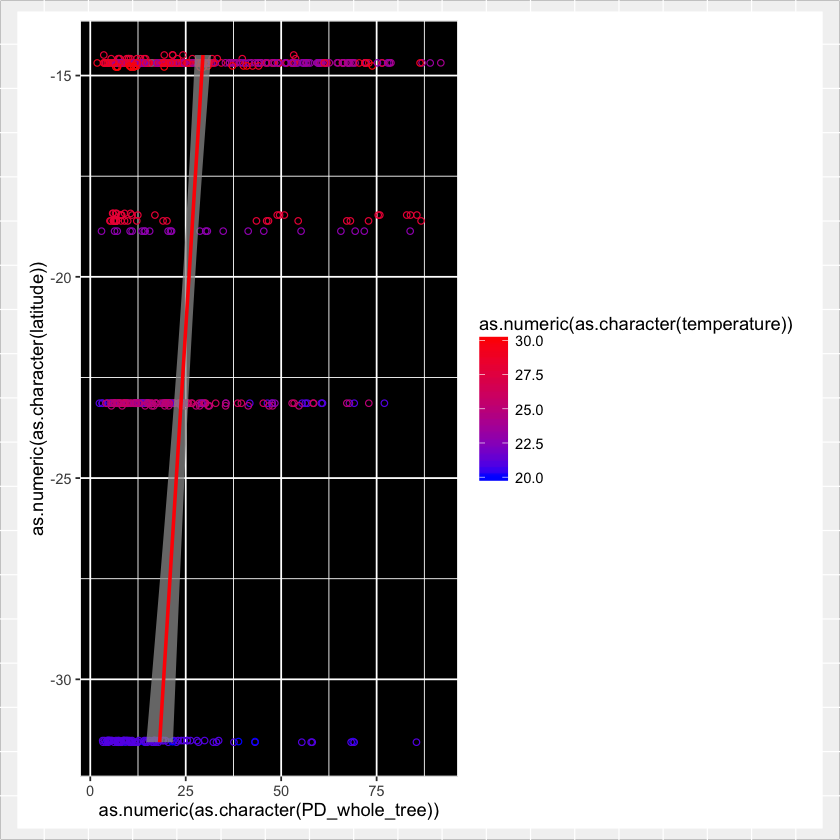

In [44]:
#Clear plot
plot1<-0

#Define plot
plot1 <-ggplot(data_corals_only, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)),color=as.numeric(as.character(temperature)))) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE, color="red", alpha = 0.75) +   # Add shaded confidence region
#    scale_y_reverse() +
    coord_flip() +
    theme(panel.background = element_rect(fill = 'black', colour = 'white')) +
    scale_colour_gradient(high="red",low="blue") 


#Apply function to standardize graph size
g1 <- set_panel_size(plot1)

#Save plot
ggsave(g1, file="/Users/FJPollock/Dropbox/Coral_Microbiomes_Postdoc/GCMP_OSU_PSU_Shared_Folder/Coral_microbe_coevolution/Projects/Australia_Coevolution_Paper/16S_analysis/7_microbiomes_w_coral_size_lat/output/figures/raw_output/lat_PD_whole_temp_color.svg")

#View plot
plot(g1)

In [68]:
#Define function to ensure plots are a consistent size (useful for overlay, multipanels, etc): 4 width x 3 height
set_panel_size_4_3 <- function(p=NULL, g=ggplotGrob(p), file=NULL, 
                           margin = unit(1,"mm"),
                           width=unit(10, "cm"), 
                           height=unit(7.5, "cm")){

  panels <- grep("panel", g$layout$name)
  panel_index_w<- unique(g$layout$l[panels])
  panel_index_h<- unique(g$layout$t[panels])
  nw <- length(panel_index_w)
  nh <- length(panel_index_h)

if(getRversion() < "3.3.0"){

   # the following conversion is necessary
   # because there is no `[<-`.unit method
   # so promoting to unit.list allows standard list indexing
   g$widths <- grid:::unit.list(g$widths)
   g$heights <- grid:::unit.list(g$heights)

   g$widths[panel_index_w] <-  rep(list(width),  nw)
   g$heights[panel_index_h] <- rep(list(height), nh)

} else {

   g$widths[panel_index_w] <-  rep(width,  nw)
   g$heights[panel_index_h] <- rep(height, nh)

}

  if(!is.null(file))
    ggsave(file, g, 
           width = convertWidth(sum(g$widths) + margin, 
                                unitTo = "in", valueOnly = TRUE),
           height = convertHeight(sum(g$heights) + margin,  
                                  unitTo = "in", valueOnly = TRUE))

  g
}

Warning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
: Removed 3 rows containing non-finite values (stat_smooth).Warning message:
: Removed 3 rows containing missing values (geom_point).Saving 7 x 7 in image
Warning message:
In cor.test(as.numeric(as.character(data_corals_only$temperature)), : NAs introduced by coercion


	Pearson's product-moment correlation

data:  as.numeric(as.character(data_corals_only$temperature)) and as.numeric(as.character(data_corals_only$PD_whole_tree))
t = -0.31387, df = 622, p-value = 0.7537
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.09098307  0.06596996
sample estimates:
        cor 
-0.01258407 


ERROR: Error in file(con, "rb"): cannot open the connection


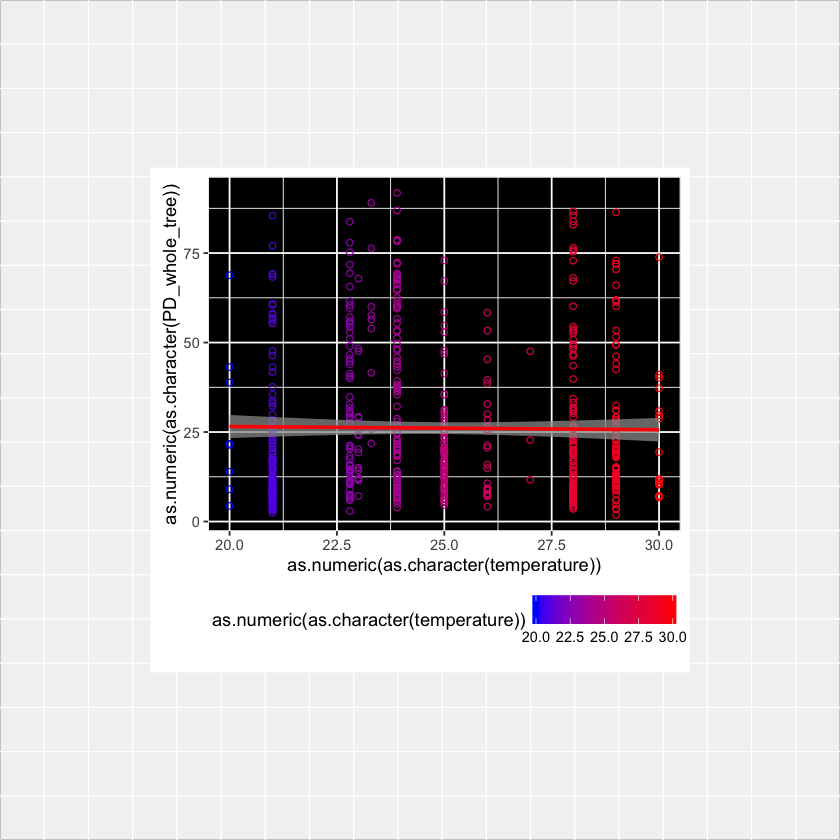

In [69]:
#PD_whole_tree~temperature

#Clear plot
plot1<-0

#Define plot
plot1 <-ggplot(data_corals_only, aes(x=as.numeric(as.character(temperature)), y=as.numeric(as.character(PD_whole_tree)),color=as.numeric(as.character(temperature)))) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE,color="red", alpha = 0.75) +    # Add shaded confidence region
    scale_colour_gradient(high="red",low="blue") +
    theme(legend.position="bottom", panel.background = element_rect(fill = 'black', colour = 'white'))


#Apply function to standardize graph size
g1 <- set_panel_size_4_3(plot1)

#Save plot
ggsave(g1, file="/Users/FJPollock/Dropbox/Coral_Microbiomes_Postdoc/GCMP_OSU_PSU_Shared_Folder/Coral_microbe_coevolution/Projects/Australia_Coevolution_Paper/16S_analysis/7_microbiomes_w_coral_size_lat/output/figures/raw_output/pd_whole_tree_temperature.svg")

#View plot
plot(g1)

cor.test(as.numeric(as.character(data_corals_only$temperature)), as.numeric(as.character(data_corals_only$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

# Size vs. diversity

In [38]:
#Import the data
read.csv('output/microbiome_age_v2.csv', header=T)->data
head(data)
#remove Unknown size
subset(data,colony_width_max != "Unknown")->data_no_unknown_size

,X.SampleID,PD_whole_tree,observed_otus,Chao1,SampleID,BarcodeSequence,runID,sequence_center_ID,sequence_center_ID_base,collection_id,ellip.h,collected_by,relevant_collaborators,visibility,visibility_method,env_biome,env_feature,prop_Colony_maximum_GCMP_recorded,prop_Colony_maximum_diameter_universal,prop_Colony_maximum_diameter,Description
1,E1.6.Iso.pali.1.20140803.M.2,37.90184,222,558.6,E1.6.Iso.pali.1.20140803.M.2,TACACAGTAG,ALVCP,Pollock117,Pollock117,Unknown,⋯,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,E1.6.Iso.pali.1.20140803.S.2,43.177,275,541.1429,E1.6.Iso.pali.1.20140803.S.2,CAGTCTACAT,ALVCP,Pollock119,Pollock119,Unknown,⋯,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,E1.6.Iso.pali.1.20140803.T.2,11.77071,72,237,E1.6.Iso.pali.1.20140803.T.2,TACTGCAGCG,ALVCP,Pollock118,Pollock118,Unknown,⋯,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,E10.Sed.1.20150627,74.79289,614,2318.721,E10.Sed.1.20150627,GATGTAGCGT,AN5UL,Pollock377_LH_268_SED,Pollock377,North_Bay_20150627,⋯,Joe_Pollock,Unknown,20,Diver_Estimate,coral_reef,animal-associated_habitat,Unknown,Unknown,Unknown,None
5,E10.Sed.1.20150628,86.31142,647,2820.015,E10.Sed.1.20150628,GTATCGTCGT,ALVCP,Pollock8,Pollock8,North_Bay_20150628,⋯,Joe_Pollock,Unknown,20,Diver_Estimate,coral_reef,animal-associated_habitat,Unknown,Unknown,Unknown,None
6,E10.Sed.1.20150630,77.96732,633,1653.509,E10.Sed.1.20150630,TCTCTGTGCA,AN5UL,Pollock419_LH_305_SED,Pollock419,Far_Flats_20150630,⋯,Joe_Pollock,Unknown,15,Diver_Estimate,coral_reef,animal-associated_habitat,Unknown,Unknown,Unknown,None


In [41]:
#Define function to ensure plots are a consistent size (useful for overlay, multipanels, etc)
set_panel_size_wide <- function(p=NULL, g=ggplotGrob(p), file=NULL, 
                           margin = unit(1,"mm"),
                           width=unit(16, "cm"), 
                           height=unit(8, "cm")){

  panels <- grep("panel", g$layout$name)
  panel_index_w<- unique(g$layout$l[panels])
  panel_index_h<- unique(g$layout$t[panels])
  nw <- length(panel_index_w)
  nh <- length(panel_index_h)

if(getRversion() < "3.3.0"){

   # the following conversion is necessary
   # because there is no `[<-`.unit method
   # so promoting to unit.list allows standard list indexing
   g$widths <- grid:::unit.list(g$widths)
   g$heights <- grid:::unit.list(g$heights)

   g$widths[panel_index_w] <-  rep(list(width),  nw)
   g$heights[panel_index_h] <- rep(list(height), nh)

} else {

   g$widths[panel_index_w] <-  rep(width,  nw)
   g$heights[panel_index_h] <- rep(height, nh)

}

  if(!is.null(file))
    ggsave(file, g, 
           width = convertWidth(sum(g$widths) + margin, 
                                unitTo = "in", valueOnly = TRUE),
           height = convertHeight(sum(g$heights) + margin,  
                                  unitTo = "in", valueOnly = TRUE))

  g
}

Saving 7 x 7 in image


[1] "Pearson's Product Moment Correlation"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_size$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_size$PD_whole_tree))
t = -2.4851, df = 642, p-value = 0.01321
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.17356130 -0.02050553
sample estimates:
        cor 
-0.09761054 


ERROR: Error in file(con, "rb"): cannot open the connection


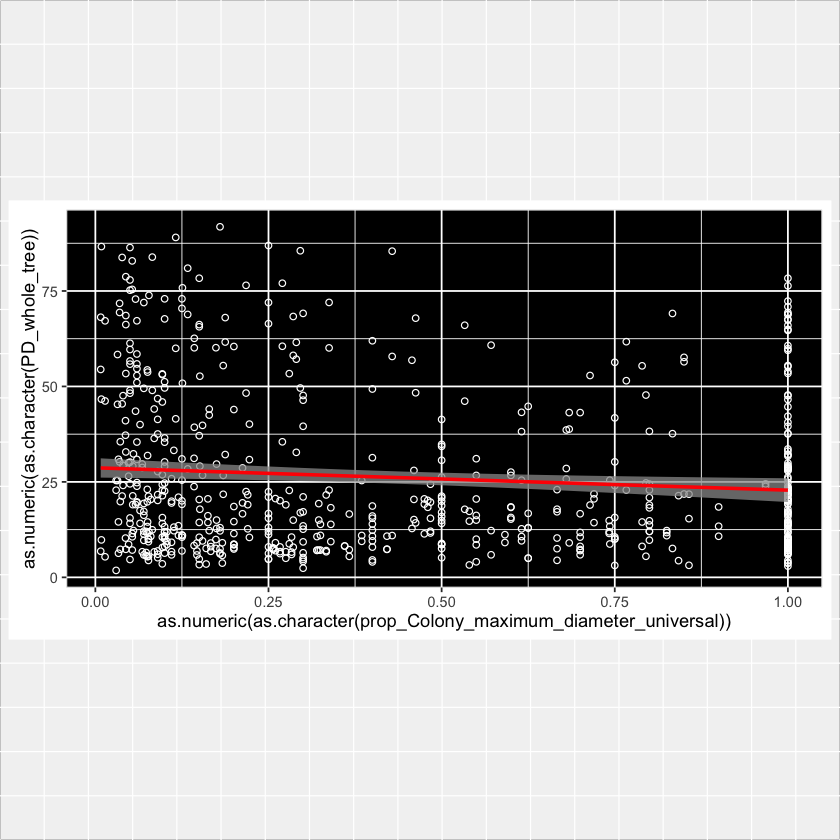

In [59]:
#PD_whole_tree vs. size (linear)

#Clear plot
plot1<-0

#Define plot
plot1 <-ggplot(data_no_unknown_size, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)))) +
    geom_point(shape=1,colour="white") +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE,    # Add shaded confidence region               
                color="red", alpha = 0.75) +    # Add shaded confidence region
#    scale_colour_gradient(high="red",low="blue") +
    theme(legend.position="bottom", panel.background = element_rect(fill = 'black', colour = 'white'))


#Apply function to standardize graph size
g1 <- set_panel_size_wide(plot1)

#Save plot
ggsave(g1, file="/Users/FJPollock/Dropbox/Coral_Microbiomes_Postdoc/GCMP_OSU_PSU_Shared_Folder/Coral_microbe_coevolution/Projects/Australia_Coevolution_Paper/16S_analysis/7_microbiomes_w_coral_size_lat/output/figures/raw_output/pd_whole_tree_size_no_color.svg")

#View plot
plot(g1)

print("Pearson's Product Moment Correlation")
cor.test(as.numeric(as.character(data_no_unknown_size$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_size$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

Saving 7 x 7 in image


[1] "Tissue"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue$PD_whole_tree))
t = -2.6445, df = 201, p-value = 0.008828
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.31316685 -0.04683771
sample estimates:
       cor 
-0.1833648 


[1] "Mucus"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_mucus$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_mucus$PD_whole_tree))
t = 0.061401, df = 210, p-value = 0.9511
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1305865  0.1389067
sample estimates:
       cor 
0.00423703 


[1] "Skeleton"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_skeleton$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_skeleton$PD_whole_tree))
t = -1.7363, df = 210, p-value = 0.08398
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.24971047  0.01604171
sample estimates:
       cor 
-0.1189644 


ERROR: Error in file(con, "rb"): cannot open the connection


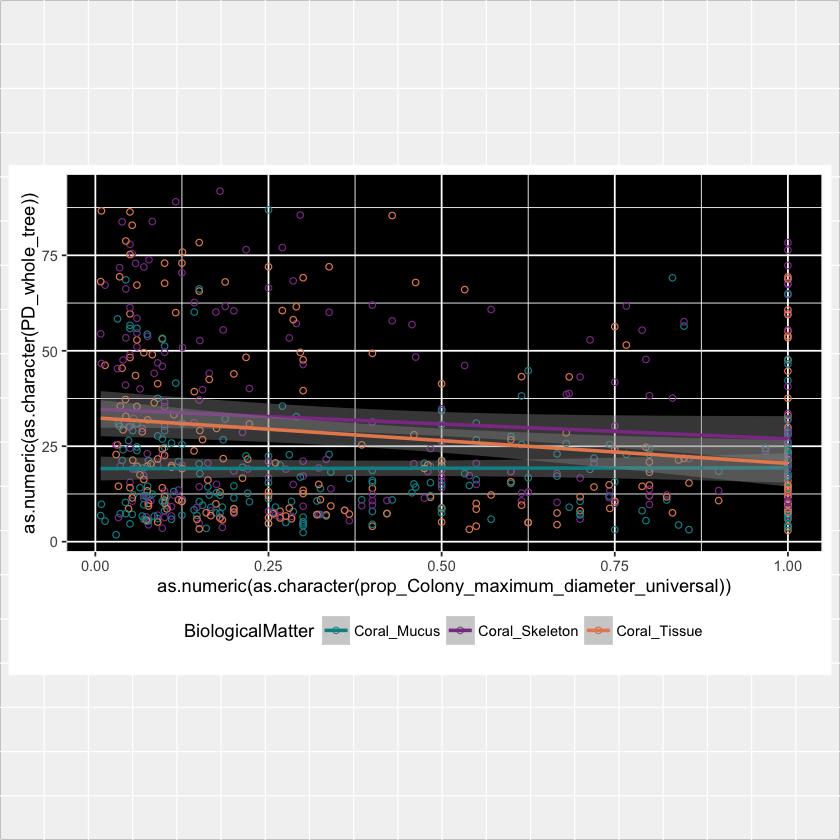

In [60]:
#PD_whole_tree vs. size (linear) w/ compartments
#Subset data
subset(data_no_unknown_size, BiologicalMatter == "Coral_Tissue")->data_no_unknown_tissue
subset(data_no_unknown_size, BiologicalMatter == "Coral_Mucus")->data_no_unknown_mucus
subset(data_no_unknown_size, BiologicalMatter == "Coral_Skeleton")->data_no_unknown_skeleton
subset(data_no_unknown_size, BiologicalMatter == "Coral_Tissue" | BiologicalMatter == "Coral_Mucus" | BiologicalMatter == "Coral_Skeleton")->data_no_unknown_all_coral

#Clear plot
plot1<-0

#Define plot
plot1 <-ggplot(data_no_unknown_all_coral, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color=BiologicalMatter)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE) +    # Add shaded confidence region
    scale_colour_manual(values = c("#038F94","#8D3D95","#E98A5C")) +
    theme(legend.position="bottom", panel.background = element_rect(fill = 'black', colour = 'white'))


#Apply function to standardize graph size
g1 <- set_panel_size_wide(plot1)

#Save plot
ggsave(g1, file="/Users/FJPollock/Dropbox/Coral_Microbiomes_Postdoc/GCMP_OSU_PSU_Shared_Folder/Coral_microbe_coevolution/Projects/Australia_Coevolution_Paper/16S_analysis/7_microbiomes_w_coral_size_lat/output/figures/raw_output/pd_whole_tree_size_color_compartments.svg")

#View plot
plot(g1)


print("Tissue")
cor.test(as.numeric(as.character(data_no_unknown_tissue$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Mucus")
cor.test(as.numeric(as.character(data_no_unknown_mucus$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_mucus$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Skeleton")
cor.test(as.numeric(as.character(data_no_unknown_skeleton$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_skeleton$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

List of 2
 $ legend.position : chr "bottom"
 $ panel.background:List of 4
  ..$ fill    : chr "black"
  ..$ colour  : chr "white"
  ..$ size    : NULL
  ..$ linetype: NULL
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

[1] "Tissue"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue$PD_whole_tree))
t = -2.6445, df = 201, p-value = 0.008828
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.31316685 -0.04683771
sample estimates:
       cor 
-0.1833648 


[1] "Mucus"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_mucus$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_mucus$PD_whole_tree))
t = 0.061401, df = 210, p-value = 0.9511
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1305865  0.1389067
sample estimates:
       cor 
0.00423703 


[1] "Skeleton"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_skeleton$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_skeleton$PD_whole_tree))
t = -1.7363, df = 210, p-value = 0.08398
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.24971047  0.01604171
sample estimates:
       cor 
-0.1189644 


ERROR: Error in file(con, "rb"): cannot open the connection


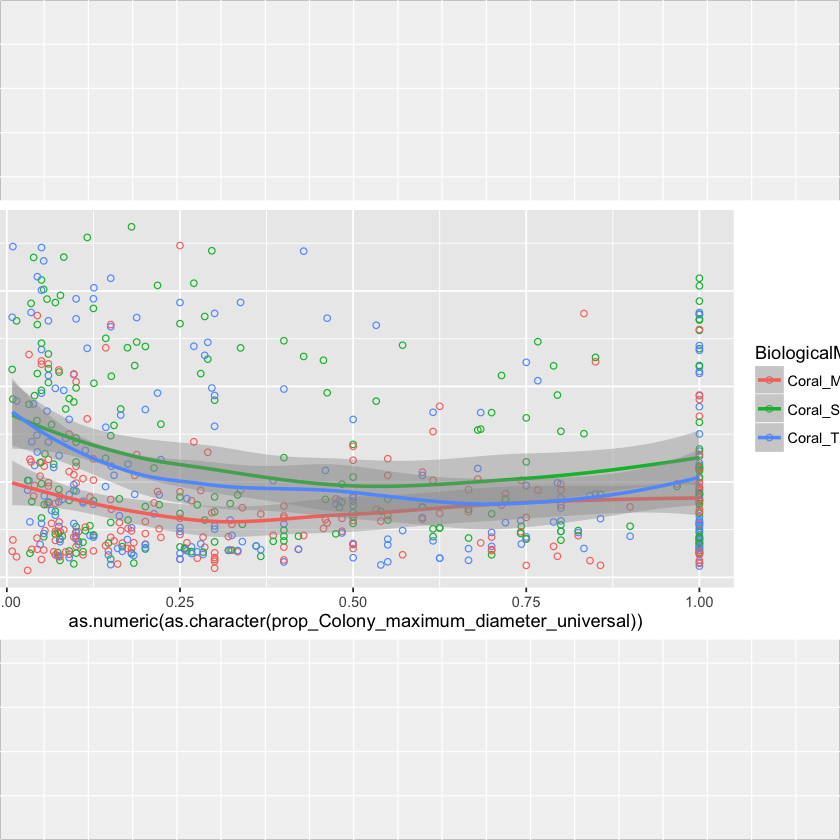

In [50]:
#PD_whole_tree vs. size (non-linear) w/ compartments
#Subset data
subset(data_no_unknown_size, BiologicalMatter == "Coral_Tissue")->data_no_unknown_tissue
subset(data_no_unknown_size, BiologicalMatter == "Coral_Mucus")->data_no_unknown_mucus
subset(data_no_unknown_size, BiologicalMatter == "Coral_Skeleton")->data_no_unknown_skeleton
subset(data_no_unknown_size, BiologicalMatter == "Coral_Tissue" | BiologicalMatter == "Coral_Mucus" | BiologicalMatter == "Coral_Skeleton")->data_no_unknown_all_coral

#Clear plot
plot1<-0

#Define plot
plot1 <-ggplot(data_no_unknown_all_coral, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color=BiologicalMatter)) +
    geom_point(shape=1) +
    geom_smooth()    # Add shaded confidence region
#    scale_colour_gradient(high="red",low="blue") +
    theme(legend.position="bottom", panel.background = element_rect(fill = 'black', colour = 'white'))


#Apply function to standardize graph size
g1 <- set_panel_size_wide(plot1)

#Save plot
#ggsave(g1, file="/Users/FJPollock/Dropbox/Coral_Microbiomes_Postdoc/GCMP_OSU_PSU_Shared_Folder/Coral_microbe_coevolution/Projects/Australia_Coevolution_Paper/16S_analysis/7_microbiomes_w_coral_size_lat/output/figures/raw_output/pd_whole_tree_temperature.svg")

#View plot
plot(g1)


print("Tissue")
cor.test(as.numeric(as.character(data_no_unknown_tissue$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Mucus")
cor.test(as.numeric(as.character(data_no_unknown_mucus$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_mucus$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Skeleton")
cor.test(as.numeric(as.character(data_no_unknown_skeleton$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_skeleton$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

# Below here is rough and requires revision

# Richness v compartment (WOULD NEED TO REDO ON RARIFIED SUBSET)

ERROR: Error in file(con, "rb"): cannot open the connection


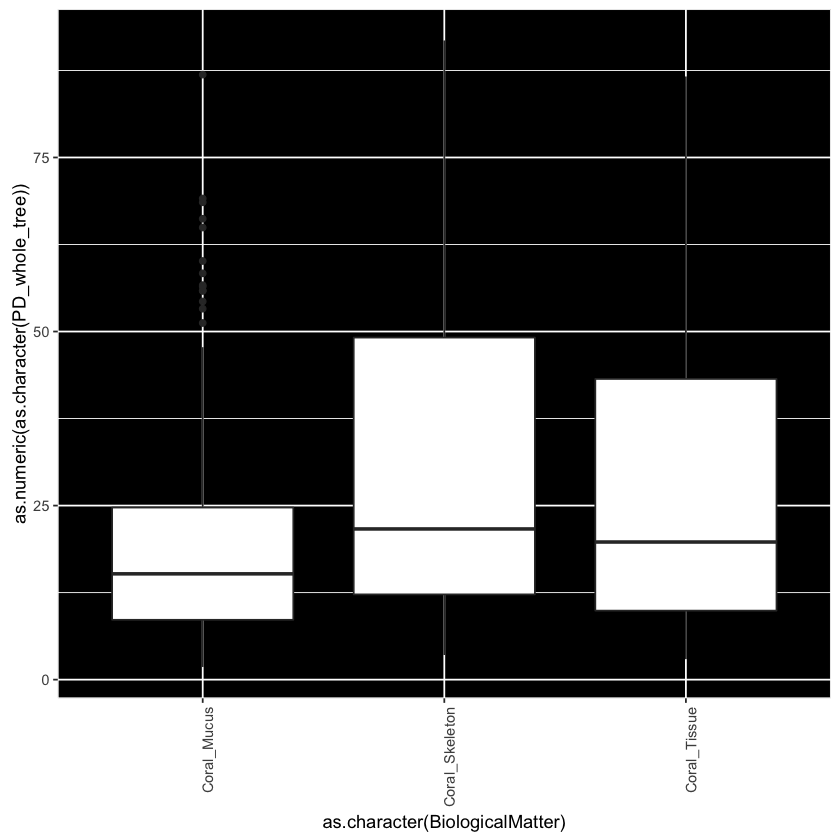

In [19]:
#Subset to only coral
subset(data, BiologicalMatter == "Coral_Mucus" |  BiologicalMatter == "Coral_Tissue" |  BiologicalMatter == "Coral_Skeleton")->data_coral_only

#Clear plot
plot1<-0

#Define plot
plot1 <-ggplot(data_coral_only, aes(x=as.character(BiologicalMatter), y=as.numeric(as.character(PD_whole_tree)))) +
    geom_boxplot() + 
#   scale_x_discrete(values=c("Coral Mucus","Coral Tissue","Coral Skeleton"))+
    scale_color_manual(values=c("#008f95", "#8d3c97", "#f37338")) +
    theme(panel.background = element_rect(fill = 'black', colour = 'white'),
        axis.text.x = element_text(angle = 90, hjust = 1),
        panel.background = element_rect(fill = 'black', colour = 'white'))



#Apply function to standardize graph size
g1 <- set_panel_size(plot1)

#Save plot
#ggsave(g1, file="/Users/FJPollock/Dropbox/Coral_Microbiomes_Postdoc/GCMP_OSU_PSU_Shared_Folder/Coral_microbe_coevolution/Projects/Australia_Coevolution_Paper/16S_analysis/7_microbiomes_w_coral_size_lat/output/figures/raw_output/lat_PD_whole_temp_color.svg")

#View plot
plot(plot1)

In [22]:
summary(aov(PD_whole_tree~BiologicalMatter, data=data_coral_only))
TukeyHSD(aov(PD_whole_tree~BiologicalMatter, data=data_coral_only))


                  Df Sum Sq Mean Sq F value   Pr(>F)    
BiologicalMatter   2  16437    8218   19.91 4.15e-09 ***
Residuals        624 257593     413                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = PD_whole_tree ~ BiologicalMatter, data = data_coral_only)

$BiologicalMatter
                                 diff       lwr        upr     p adj
Coral_Skeleton-Coral_Mucus  12.197480  7.561265 16.8336939 0.0000000
Coral_Tissue-Coral_Mucus     8.302062  3.614742 12.9893809 0.0001069
Coral_Tissue-Coral_Skeleton -3.895418 -8.582737  0.7919012 0.1251028


ERROR: Error in file(con, "rb"): cannot open the connection


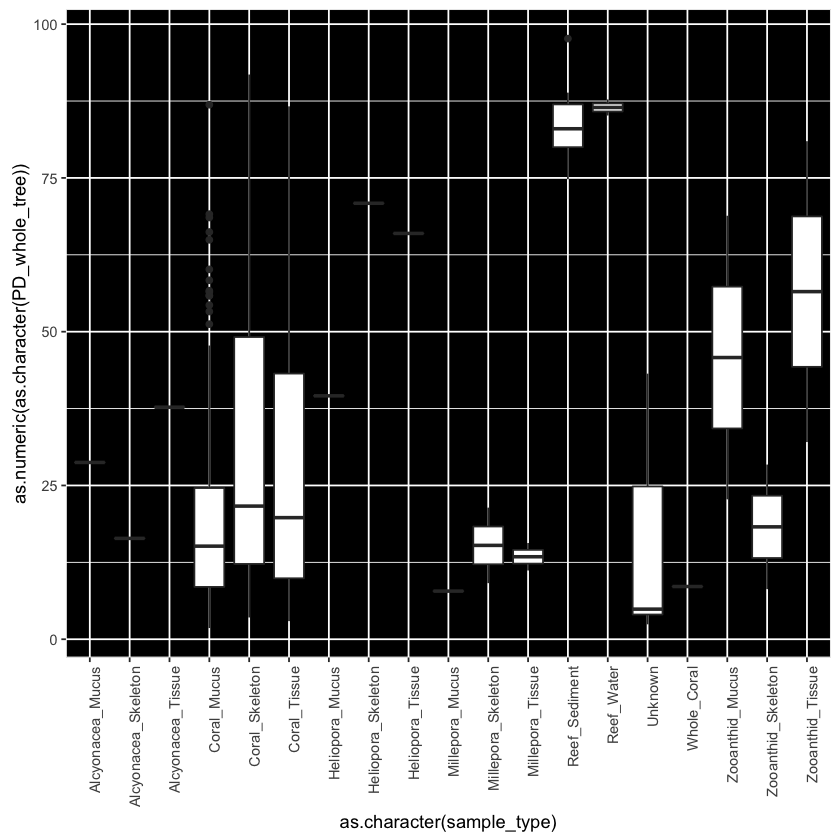

In [24]:
#Clear plot
plot1<-0

#Define plot
plot1 <-ggplot(data, aes(x=as.character(sample_type), y=as.numeric(as.character(PD_whole_tree)))) +
    geom_boxplot() + 
#   scale_x_discrete(values=c("Coral Mucus","Coral Tissue","Coral Skeleton"))+
    scale_color_manual(values=c("#008f95", "#8d3c97", "#f37338")) +
    theme(panel.background = element_rect(fill = 'black', colour = 'white'),
        axis.text.x = element_text(angle = 90, hjust = 1),
        panel.background = element_rect(fill = 'black', colour = 'white'))



#Apply function to standardize graph size
g1 <- set_panel_size(plot1)

#Save plot
#ggsave(g1, file="/Users/FJPollock/Dropbox/Coral_Microbiomes_Postdoc/GCMP_OSU_PSU_Shared_Folder/Coral_microbe_coevolution/Projects/Australia_Coevolution_Paper/16S_analysis/7_microbiomes_w_coral_size_lat/output/figures/raw_output/lat_PD_whole_temp_color.svg")

#View plot
plot(plot1)

In [2]:
help(cor.test)

cor.test {stats},R Documentation
"x, y",numeric vectors of data values. x and y must have the same length.
alternative,"indicates the alternative hypothesis and must be one of ""two.sided"", ""greater"" or ""less"". You can specify just the initial letter. ""greater"" corresponds to positive association, ""less"" to negative association."
method,"a character string indicating which correlation coefficient is to be used for the test. One of ""pearson"", ""kendall"", or ""spearman"", can be abbreviated."
exact,a logical indicating whether an exact p-value should be computed. Used for Kendall's tau and Spearman's rho. See ‘Details’ for the meaning of NULL (the default).
conf.level,confidence level for the returned confidence interval. Currently only used for the Pearson product moment correlation coefficient if there are at least 4 complete pairs of observations.
continuity,"logical: if true, a continuity correction is used for Kendall's tau and Spearman's rho when not computed exactly."
formula,"a formula of the form ~ u + v, where each of u and v are numeric variables giving the data values for one sample. The samples must be of the same length."
data,an optional matrix or data frame (or similar: see model.frame) containing the variables in the formula formula. By default the variables are taken from environment(formula).
subset,an optional vector specifying a subset of observations to be used.
na.action,"a function which indicates what should happen when the data contain NAs. Defaults to getOption(""na.action"")."
